Epoch 0
policy evaluation finished after 100 iterations with delta= 0.006538056147238791
policy improvement finished with policy delta: 7.810249675906654
Policy:
[[0 0 2 0 2]
 [0 1 2 1 2]
 [1 1 3 3 2]
 [1 0 0 2 2]
 [1 1 1 1 2]]
Values:
[[-19.9  10.  -19.9   5.  -18.9]
 [  0.    0.    0.    0.  -19.9]
 [  0.    0.    0.    0.  -18.9]
 [  0.    0.    0.    0.  -19.9]
 [  0.    0.  -19.9 -18.9 -19.9]]
Epoch 1
policy evaluation finished after 77 iterations with delta= 9.85700410183199e-10
policy improvement finished with policy delta: 4.358898943540674
Policy:
[[0 0 2 0 2]
 [1 1 1 2 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 2 1 1 1]]
Values:
[[ 9.5 10.   9.5  5.   4.8]
 [ 9.   9.5  9.   4.8  4.5]
 [ 8.6  9.   0.   0.   0. ]
 [ 8.1  0.   0.   0.   0. ]
 [ 7.7  0.   0.   0.   0. ]]
Epoch 2
policy evaluation finished after 100 iterations with delta= 1.5968416278155928e-07
policy improvement finished with policy delta: 2.23606797749979
Policy:
[[0 0 2 0 2]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [1 1 1

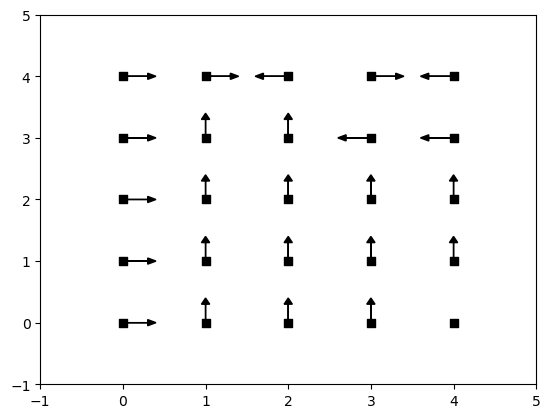

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

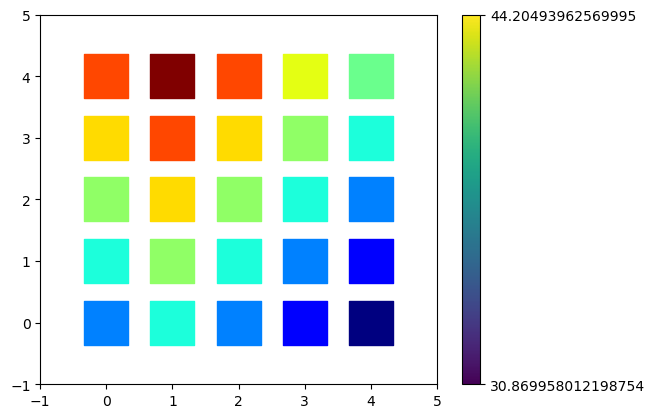

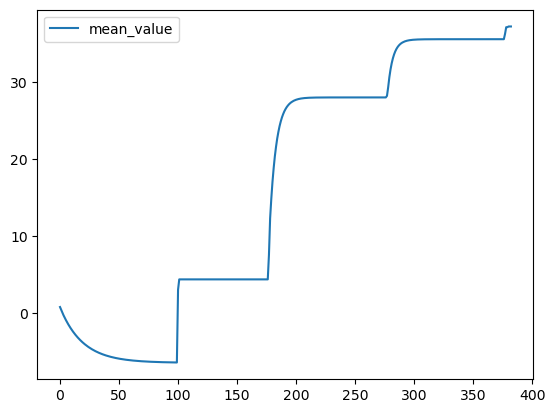

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


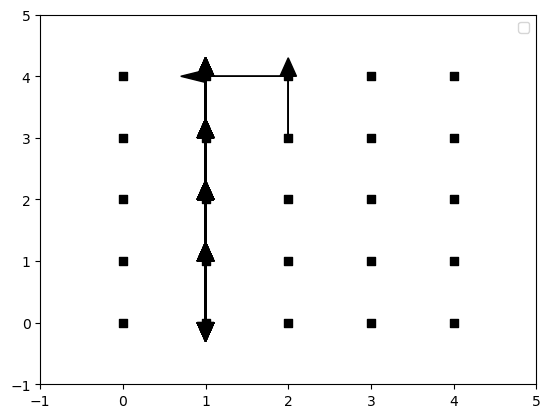

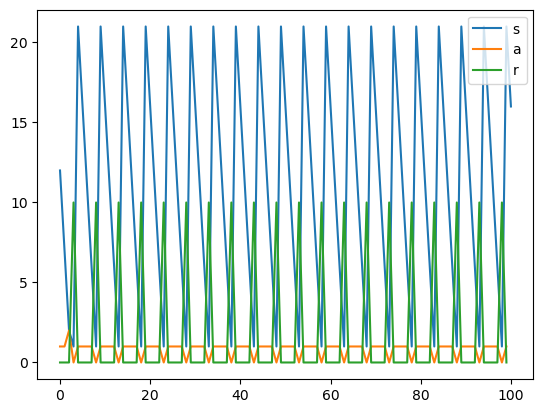

delta: 9.538199624049142
Policy:
[0 0 2 0 2 0 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Values:
[ 0.71816955 10.29416758  9.7794592   5.56076846  5.28273004  0.89077135
  9.7794592   9.29048624  8.82596193  8.38466383  0.84623278  9.29048624
  8.82596193  8.38466383  7.96543064  0.80392114  8.82596193  8.38466383
  7.96543064  7.56715911  0.76372508  8.38466383  7.96543064  7.56715911
  7.18880115]
delta: 9.061289642846685
Policy:
[0 0 2 0 2 0 1 1 2 2 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
Values:
[ 9.7794592  17.96543064 17.06715911 12.96543064 12.31715911  9.29048624
 17.06715911 16.21380115 15.40311109 14.63295554  8.82596193 16.21380115
 15.40311109 14.63295554 13.90130776  8.38466383 15.40311109 14.63295554
 13.90130776 13.20624237  7.96543064 14.63295554 13.90130776 13.20624237
 12.54593025]
delta: 7.287699908727838
Policy:
[0 0 2 0 2 0 1 1 2 2 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
Values:
[17.06715911 23.90130776 22.70624237 18.90130776 17.95624237 16.21380115
 22.70624237 21.57093025 20.49238374

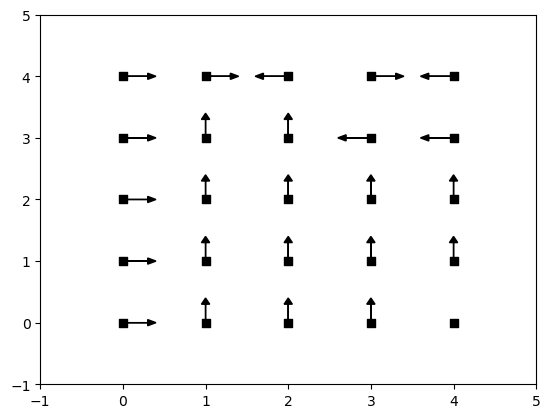

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

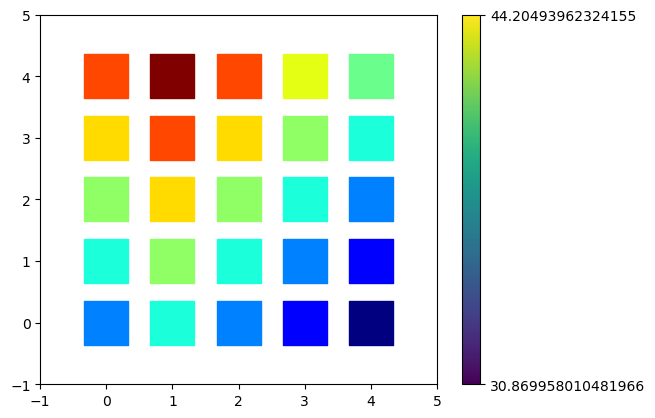

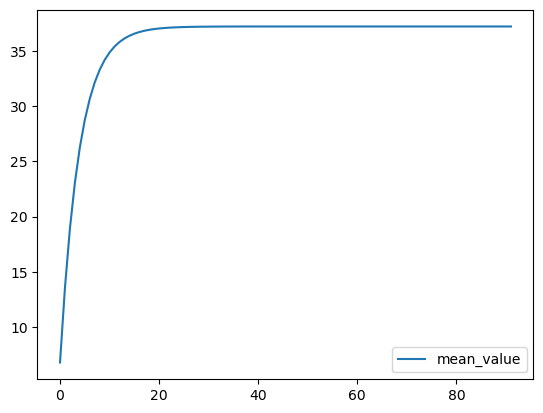

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


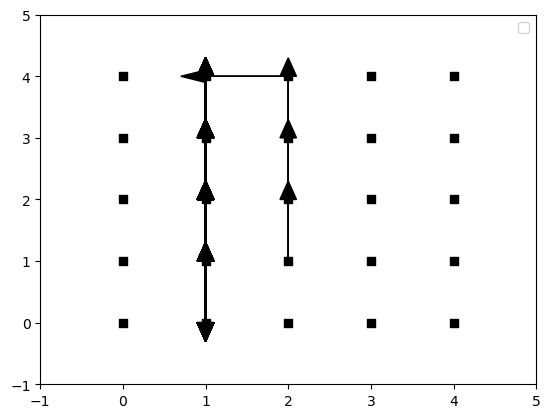

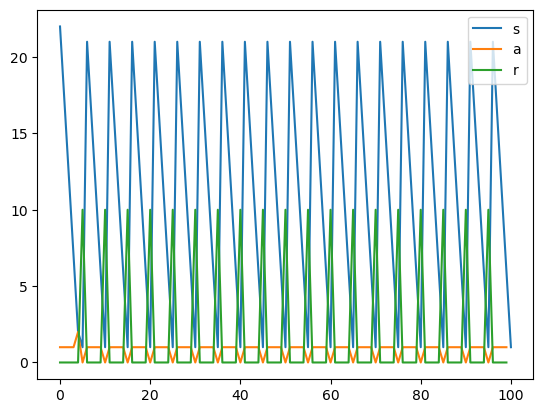

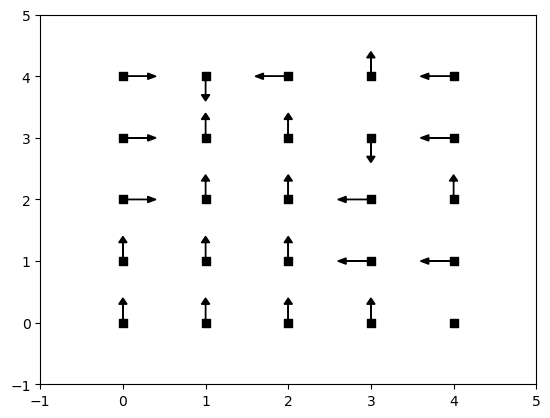

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

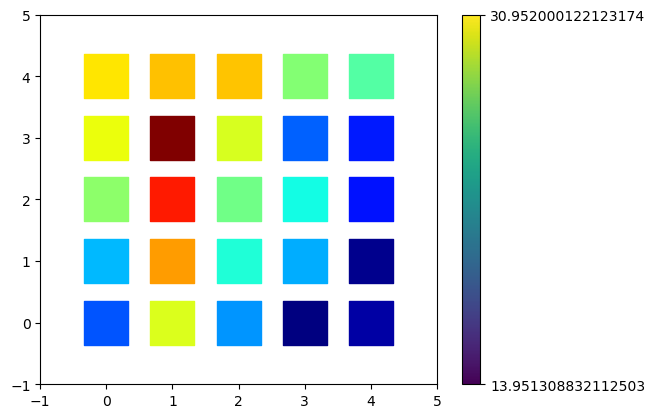

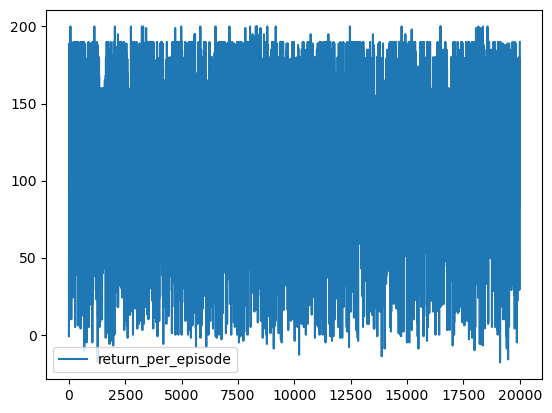

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


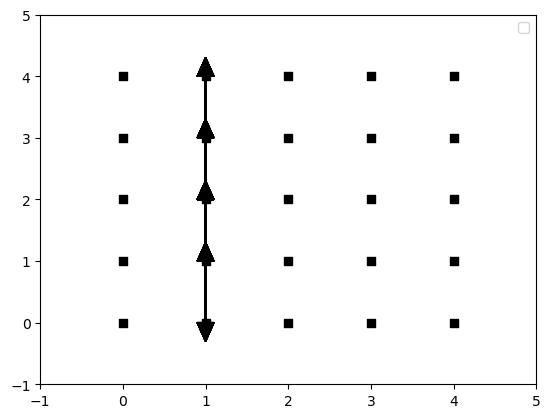

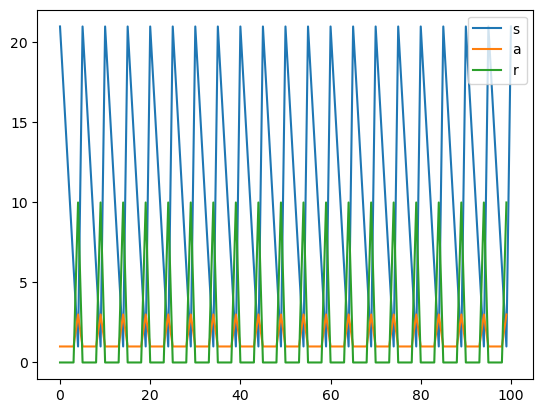

[[23.56337152 22.54249921 22.93682888 22.84766811]
 [23.6762283  20.69917342 21.51963886 24.87166091]
 [23.89746373 21.07042747 21.3700351  19.17109542]
 [24.92330386 24.67530272 24.66452847 22.27262572]
 [15.43058832 15.63092666 21.36285603 16.61491961]
 [21.06020207 22.44239098 21.05468412 20.58660058]
 [20.09537388 18.64090974 21.49731765 18.56913433]
 [20.22808317 20.52581296 20.55272735 20.0974894 ]
 [17.184934   17.36170921 20.75773379 19.63214734]
 [15.80105017 15.88478394 13.80732795 16.4775714 ]
 [17.01896335 22.7140396  16.82520803 16.91729574]
 [18.61490466 14.63571985 16.25029087 17.16989558]
 [19.25546226 19.57100903 19.3824878  17.21594882]
 [16.86877994 14.33469428 17.59420493 17.04346607]
 [15.70087545 16.51522795 16.61790413 16.70423194]
 [16.98536356 14.44581527 15.4925108  15.29241427]
 [16.2784335  17.74578039 16.70833532 13.80744538]
 [16.66982285 14.02861389 16.4618667  16.46854428]
 [16.96238702 13.92060195 15.68790207 15.73372765]
 [16.29785974 16.66991293 16.77

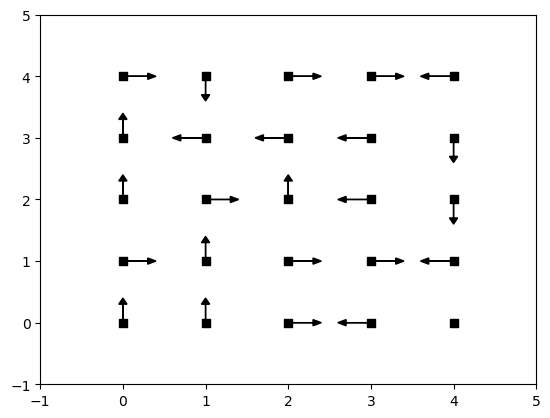

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

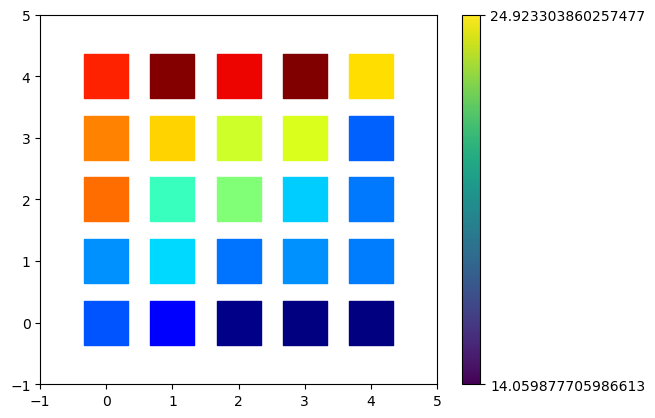

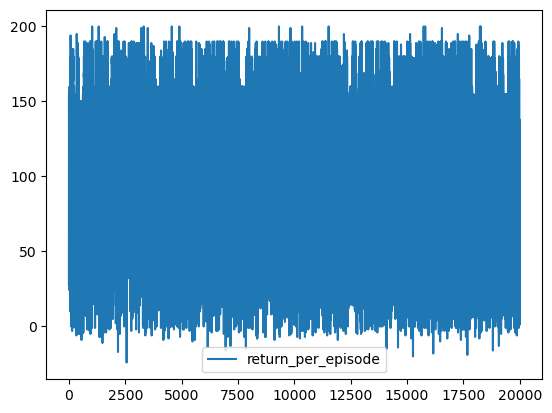

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


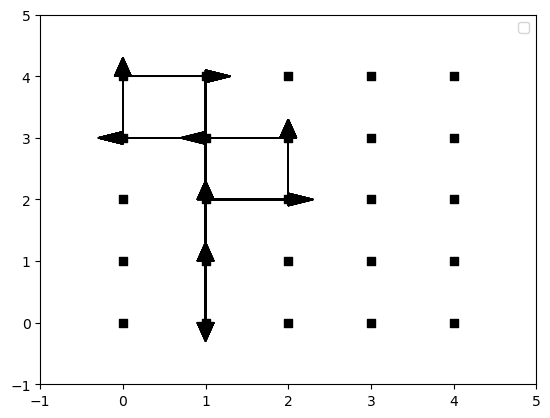

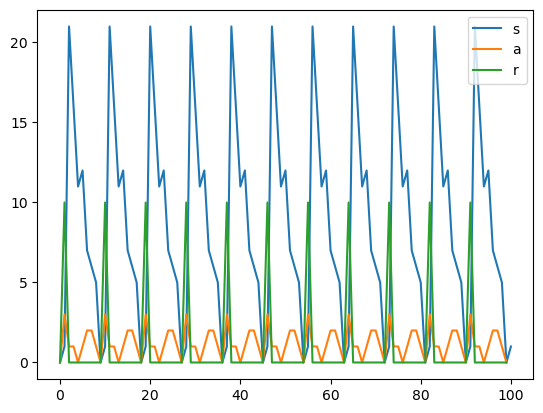

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import gridworld
from utils import get_learn_function

# algorithm='q_learning'
algorithms = ['policy_iteration', 'value_iteration', 'sarsa', 'q_learning']
scene = ['gridworld', 'pendulum']
max_it = [100, 100, 20000, 20000]
# algorithm='value_iteration'
load_checkpoint = False
train = True

# Create environment
env = gridworld.GridWorld(hard_version=False)

for alg, max_it in zip(algorithms, max_it):
    env.reset()
    learn = get_learn_function(alg=alg)
    checkpoint = 'ckp' if load_checkpoint else None
    model = learn(env, scene='gridworld', epsilon=0.1, alpha=0.3, max_it=max_it, load=checkpoint, train=train)
    model.save_checkpoint('ckp')

    # Initialize simulation
    s = env.reset()

    # Create log to store data from simulation
    log = {
        't': [0],
        's': [s],
        'a': [],
        'r': [],
    }

    # Simulate until episode is done
    done = False

    while not done:
        a = model.get_policy(s)
        (s, r, done) = env.step(a)
        log['t'].append(log['t'][-1] + 1)
        log['s'].append(s)
        log['a'].append(a)
        log['r'].append(r)

        model.plot.add('trajectory', env.get_pos(s), 'trajectory', color='red', alpha=0.5)

    model.plot.plot_policy(model.get_policy(), save=True)
    model.plot.plot_state_value_function(model.get_state_value_function(), save=True)
    model.plot.plot(save=True)

    # Plot data and save to png file
    plt.plot(log['t'], log['s'])
    plt.plot(log['t'][:-1], log['a'])
    plt.plot(log['t'][:-1], log['r'])
    plt.legend(['s', 'a', 'r'])
    plt.savefig('figures/gridworld/test_gridworld.png')
    plt.show()